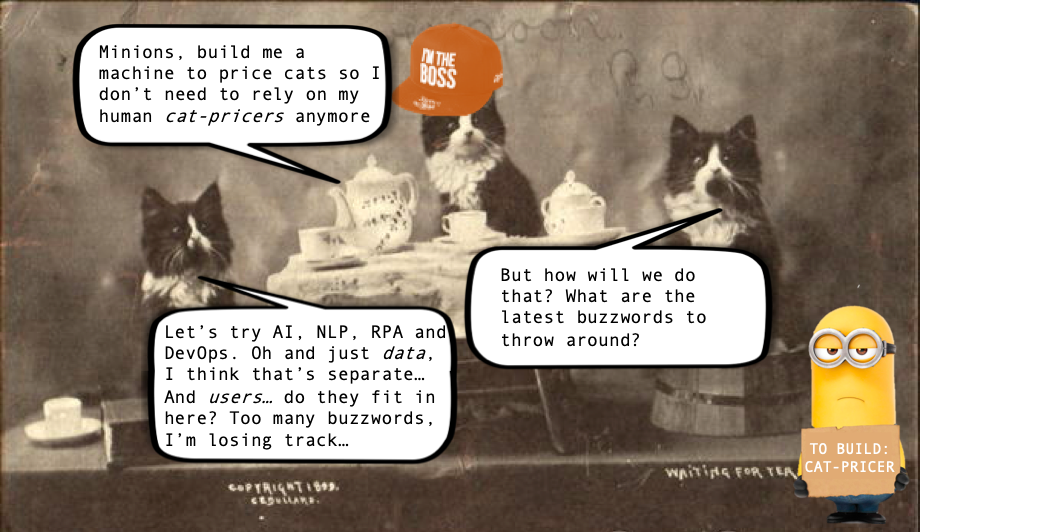

In [2]:
#import libraries and set style 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('seaborn')

In [3]:
#read csv to data objects
df = pd.read_csv('/Users/gz567ve/Documents/Personal/cat/master_cat_input_input.csv', encoding='latin')

#remove formatting from price and change 
df['price'] = df['price'].replace( '[\£)]','', regex=True)
df['price'] = df['price'].replace( '[\,)]','', regex=True)
df['price'] = pd.to_numeric(df['price'])

In [4]:
#define a mega-array of all options that we want to check the description for (taken "norwegian" out of breeds)
all_options = {'has_colours': ['tabby', 'black', 'white', 'blue', 'ginger'],
               'has_breeds': ["bengal", "british", "coon", "persian", "ragdoll"],
               'is_looked_after': ["flea","vaccin","worm"],
               'known_family': ["dad",'mum','father','mother','parents'],
               'has_other_items': ['toy'],
               'known_sex': ['boy', 'female','girl','male'],
               'is_indoor_or_outdoor': ['inside','outside','garden']
              }

#create a function to create the new columns based on all_options array
def create_new_columns(array,option_dict):
    for option in option_dict:
        array[option] = False
        reverse_option_string = option + '_inverse'
        array[reverse_option_string] = False
        for specific_option in option_dict[option]:        
            array[specific_option] = array['dec'].str.contains(specific_option)
            df.loc[df[specific_option] == True, option] = True
        df.loc[df[option] == False, reverse_option_string] = True
            
        
#Call function and create all new columns
create_new_columns(df,all_options)

#add calculated columns 
df['dec_length'] = df['dec'].str.len()


#define function to turn time column into number
def time_as_num(s):
    if len(s) == 3:
        return 0
    elif len(s) <= 9:
        return s[3]
    elif len(s) > 9:
        return s[3:5]
    
df['readytoleave_num'] = pd.to_numeric(df['readytoleave'].apply(time_as_num))

In [5]:
#define subplot params to be included in subsequent calls to create graphs (only works on 6 subplots)
six_subplots_params = {"0": {'colour': 'firebrick','x_pos': 0, 'y_pos': 0},
                       "1": {'colour': 'olivedrab','x_pos': 0, 'y_pos': 1},
                       "2": {'colour': 'darkorange','x_pos': 0, 'y_pos': 2},
                       "3": {'colour': 'cornflowerblue','x_pos': 1, 'y_pos': 0},
                       "4": {'colour': 'dimgrey','x_pos': 1, 'y_pos': 1},
                       "5": {'colour': 'violet','x_pos': 1, 'y_pos': 2},
                      }

In [6]:
#Define a function to take in the 'all options' array and a specified column of a title to produce a 6X6 graph
def plot_on_6_subs(all_options_dict,selected_option,params,title):
    #create input array including nil-option
    input_array = list(all_options[selected_option])
    reverse_of_selected_option = selected_option  + '_inverse'
    input_array.append(reverse_of_selected_option)
    
    #create plots 
    fig, axs = plt.subplots(2,3)
                   
    #loop through each element in new array and create new graphs
    for each_input, each_param in zip(input_array, params):
        axs[params[each_param]['x_pos'], params[each_param]['y_pos']].scatter(df[df[each_input]].dec_length, df[df[each_input]].price, color=params[each_param]['colour'], label=each_input, s=5)

    #sort out the axes and give them all the same fixed length
    custom_xlim = (0, 2000)
    custom_ylim = (0, 1550)
    plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim, file='f')

    #finally, hide the inner labels
    for ax in axs.flat:
        ax.label_outer()
        #look at this and think about moving plot into axes - https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py

    #show legend and axis titles
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.suptitle(title)

    


In [ ]:
#Call function above for all dimensions and view graphs
for each_title in all_options:
    title = 'Length of description (characters, x-axis) vs. cost (£s, y-axis) by ' + each_title
    plot_on_6_subs(all_options,each_title,six_subplots_params,title)

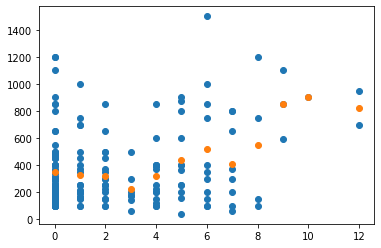

In [6]:
#investigate whether ready to leave time is a factor
plt.scatter(df['readytoleave_num'],df['price'])
x_ave = [x for x in range(0,13)]
y_ave = []
for i in range(0,13):
    y_ave.append(df[df['readytoleave_num'] == i].price.mean())

plt.scatter(x_ave,y_ave)
plt.show()

# Graveyard

In [ ]:
list(df.columns)

In [ ]:
df.tail(5)

In [ ]:
print(df.iloc[100])

In [ ]:
print(x, "mean is",df[df[x]].price.mean())
print(x, "std is",df[df[x]].price.std())


    

In [8]:
df[(df.price > 500)]

,web-scraper-order,web-scraper-start-url,linktopage-href,title,age,readytoleave,dec,num_pics,price,location,...,female,girl,male,is_indoor_or_outdoor,is_indoor_or_outdoor_inverse,inside,outside,garden,dec_length,readytoleave_num
10,1588698260-46,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/all-kittens-alr...,ALL KITTENS ALREADY RESERVED Beautiful Persian...,8 weeks,Now,Lovely Persian Dolly face fluffy Kittens are r...,1 of 7,650.0,"Leytonstone, London",...,False,False,False,False,True,False,False,False,708,0
14,1588698213-24,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/full-beautiful-...,Full beautiful Bengal girl kitten ready in 2 w...,6 weeks,in 2 weeks,Beautiful bengal girl \nLast kitten unreserved...,1 of 5,650.0,"Brighton, East Sussex",...,False,True,False,False,True,False,False,False,146,2
20,1588698287-58,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/siberian-neva-m...,Siberian Neva Masquerade Kittens,5 weeks,in 8 weeks,Siberian / Neva Masquarade kittens for sale\n\...,1 of 10,1200.0,"Bromley, London",...,False,True,False,False,True,False,False,False,664,8
25,1588698279-55,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/long-waited-bri...,Long waited British Short Hair Blue kittens av...,2 weeks,in 12 weeks,__________\n!!!Update!!!!\nThank you for your ...,1 of 9,950.0,"Enfield, London",...,False,True,False,True,False,False,True,False,883,12
30,1588698329-78,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/rare-full-white...,Rare full white european shorthair kittens.,7 weeks,in 1 week,Adorable white kittens looking for a loving ho...,1 of 7,700.0,"Enfield, London",...,False,False,False,False,True,False,False,False,486,1
40,1588698190-13,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/-gorgeous-ragdo...,*** Gorgeous Ragdoll kittens ***,3 weeks,in 5 weeks,I have a stunning litter of Ragdoll kittens.\n...,1 of 8,875.0,"Slough, Berkshire",...,False,True,False,False,True,False,False,False,814,5
41,1588698205-20,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/siberian-kitten...,Siberian kittens,3 months,Now,Siberian kittens for sale.\n\nBoth parents imp...,1 of 2,1100.0,"Ifield, West Sussex",...,False,False,False,False,True,False,False,False,564,0
42,1588698293-61,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/-an-odd-eyed-bl...,__An odd-eyed blue/green white male kitten__/ ...,8 weeks,in 1 week,An odd-eyed pure white gorgeous kitten with on...,1 of 5,700.0,"Belvedere, London",...,False,False,False,False,True,False,False,False,879,1
49,1588698345-85,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/british-blue-sh...,British Blue shorthair kittens,2 weeks,in 7 weeks,No time wasters!!!!! Unknown number will not b...,1 of 9,800.0,"Wallington, London",...,False,True,False,False,True,False,False,False,739,7
51,1588698302-65,https://www.gumtree.com/search?search_category...,https://www.gumtree.com/p/cats/1-adorable-kitt...,1 Adorable Kitten Girl Colourpoint White-Ginger,6 weeks,in 6 weeks,Exotix Shorthair Girl was born on 23th of Apri...,1 of 5,1000.0,"Streatham Common, London",...,False,True,False,False,True,False,False,False,674,6
